In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown , Math 

sns.set()


<h1> Desiosion Tree Clasifier </h1>

<h1> Entropy </h1>

<img src='https://miro.medium.com/max/1050/1*i7cfMirN2WpaJhYZa1a1Mg.png'/>

The entropy appeared in the thermodynamic field in the works of  Rudolf Clausius over the temperature of the gas. In ML the entropy plays an important row because it is a measure of chaos, disorder, or uncertainty of the system.
The above graphics represent the two gasses initially they have a low entropy because they are cleanly separable, after some time, however, the gasses intermingle and the system's entropy increased. 

In [4]:
iris = pd.read_csv("../../../resources/data/IRIS.csv")  
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

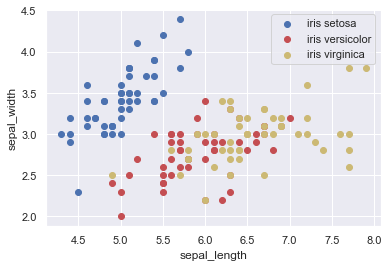

In [75]:
#iris.loc[iris['species' == 'd']]
iris_setosa=iris[iris['species'] == 'Iris-setosa']
iris_versicolor=iris[iris['species'] == 'Iris-versicolor'] 
iris_virginica=iris[iris['species'] == 'Iris-virginica']
def plot_data():
    plt.scatter(iris_setosa['sepal_length'].to_numpy(),iris_setosa['sepal_width'].to_numpy(),color='b',label='iris setosa')
    plt.scatter(iris_versicolor['sepal_length'].to_numpy(),iris_versicolor['sepal_width'].to_numpy(),color='r',label='iris versicolor')
    plt.scatter(iris_virginica['sepal_length'].to_numpy(),iris_virginica['sepal_width'].to_numpy(),color='y',label='iris virginica')
    plt.ylabel('sepal_width')
    plt.xlabel('sepal_length')
    plt.legend()
#plt.gca().set_aspect(60/30)
plot_data()

If we pick up a random iris the  probabilyty to be the iris setosa is : 

In [61]:
probavility_setosa = iris[iris['species'] == 'Iris-setosa'].shape[0]/iris.shape[0]
print('p(iris setosa)= p(size(iris)/size(iris-setosa))= {}%'.format( probavility_setosa))

p(iris setosa)= p(size(iris)/size(iris-setosa))= 0.3333333333333333%


In [67]:
iris[iris['sepal_width'] > 3.5]

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa


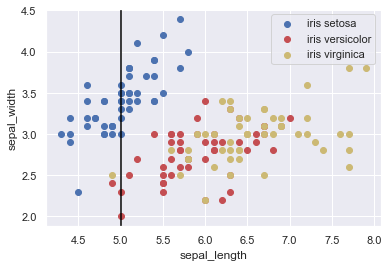

In [77]:
plot_data()
plt.axvline(x=5,color='black')

if we get the left side of data sepatated by black line then the probabily to get the 'iris-setosa' is  

In [102]:
iris_s = iris[(iris['sepal_width'] > 3.5) & (iris['species'] == 'Iris-setosa')].shape[0]
iris = iris[(iris['sepal_width'] > 3.5)].shape[0]
print('p(iris setosa)= p(size(iris)/size(iris-setosa))= {}%'.format( iris_s/iris))

p(iris setosa)= p(size(iris)/size(iris-setosa))= 0.8333333333333334%


In [97]:
#iris.loc[iris['sepal_width'] > 3.5 and iris['sepal_width'] <5]



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [82]:
probavility_setosa = iris[ (iris['species'] == 'Iris-setosa') & (iris[iris['sepal_width'] > 3.5]) ].shape[0]/iris.shape[0]
print('p(iris setosa)= p(size(iris)/size(iris-setosa))= {}%'.format( probavility_setosa))

TypeError: unsupported operand type(s) for &: 'bool' and 'float'

<h2> References </h2>
[1] <a href = 'https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/'> How To Implement The Decision Tree Algorithm From Scratch In Python </a> <br> <br>
[2] <a href = 'analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/'> 4 Simple Ways to Split a Decision Tree in Machine Learning </a>